In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Step 2: Load Data
train_df = pd.read_csv("fraudTrain.csv")
test_df = pd.read_csv("fraudTest.csv")



In [3]:
# Step 3: Combine train + test for consistent preprocessing
df = pd.concat([train_df, test_df])



In [4]:
# Step 4: Feature Engineering
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month

df['dob'] = pd.to_datetime(df['dob'])
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

# Drop unnecessary columns
df.drop(columns=['trans_date_trans_time', 'cc_num', 'first', 'last', 'dob',
                 'street', 'city', 'state', 'zip', 'trans_num', 'unix_time', 'merchant', 'job'], inplace=True)

# Encode categorical data
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])
df['gender'] = le.fit_transform(df['gender'])



In [5]:
# Step 5: Separate features and label
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']



In [6]:
# Step 6: Train-test split (90% train, 10% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)



In [7]:
# Step 7: Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}



In [8]:
# Step 8: Evaluation
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    print("Classification Report:")
    print(classification_report(y_val, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]))




Model: Logistic Regression


C:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[174179  10096]
 [   230    735]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    184275
           1       0.07      0.76      0.12       965

    accuracy                           0.94    185240
   macro avg       0.53      0.85      0.55    185240
weighted avg       0.99      0.94      0.97    185240

ROC-AUC Score: 0.8645572826712723

Model: Decision Tree
Confusion Matrix:
[[184122    153]
 [   168    797]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    184275
           1       0.84      0.83      0.83       965

    accuracy                           1.00    185240
   macro avg       0.92      0.91      0.92    185240
weighted avg       1.00      1.00      1.00    185240

ROC-AUC Score: 0.9125382274605073

Model: Random Forest
Confusion Matrix:
[[184258     17]
 [   227    738]]
Classification Report:
      

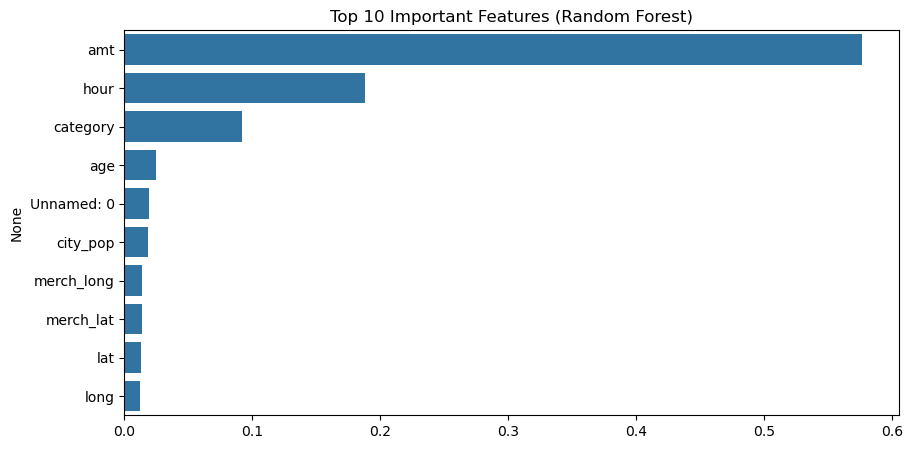

In [9]:
# Optional: Feature importance for Random Forest
feat_imp = models["Random Forest"].feature_importances_
imp_df = pd.Series(feat_imp, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=imp_df.values[:10], y=imp_df.index[:10])
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


In [ ]:
#Random Forest had the best accuracy and ROC-AUC.
#Random Forest performed best, with 98% precision and 76% recall for fraud detection
